# discrate_ds1


_This notebook describes results of first run of __[Discrate](https://github.com/tsgouvea/discrate/tree/309448f92ff401075592e49c7c32cb75fb58382a)__, a 2AFC task that pitches reward rate against immediacy. In each trial, rats chose freely between two choice ports with different pre- and post-choice delays. Reward probability is 0.5,_ iid _across trials._

In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import scipy.io as sio
import scipy as sp
import statsmodels.api as sm
from IPython.display import display, HTML

from tasks import discrate

/Users/thiago/Programs/anaconda2/envs/tasksuite/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Load single sessions (Bpod .mat files stored in same repository as this notebook) and build pandas dataframes with session summary (**dataSumm**) and single trial (**dataSing**) data:

In [2]:
path_ds1 = 'datasets/discrate_ds1/'
listSubj = next(os.walk(path_ds1))[1]
listSubj.sort()
listSess = [[]]*len(listSubj)
dataSumm = discrate.multisess()
dataSing = [[]]*len(listSubj)
indSubj = []
indDate = []

listDs = open(os.path.join('datasets','discrate_ds1.txt'),'w')

for iSubj in range(len(listSubj)) :
    subj = listSubj[iSubj]
    listSess[iSubj] = os.listdir(os.path.join(path_ds1,subj))
    listSess[iSubj].sort()
    dataSing[iSubj] = [[]]*len(listSess[iSubj])
    dates = [[]]*len(listSess[iSubj])

    for iSess in range(len(listSess[iSubj])) :
        sessName = listSess[iSubj][iSess]
        date = re.split('_',listSess[iSubj][iSess])
        dates[iSess] = date[2]
        fname = os.path.join(path_ds1,subj,sessName)
        listDs.write(fname + '\n')
        mysess = sio.loadmat(fname, squeeze_me=True)
        parsed = discrate.parser(mysess)
        parsed.parse()
        dataSumm.append(parsed)
        dataSing[iSubj][iSess] = parsed.parsedData
        indSubj.append(listSubj[iSubj])
        indDate.append(date[2])
        
listDs.close()
dataSumm.summary['subject'] = indSubj
dataSumm.summary['date'] = indDate

/Users/thiago/Documents/TaskSuite/tasks/discrate.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  logOdds = np.log(pLeft/(1-pLeft))
/Users/thiago/Documents/TaskSuite/tasks/discrate.py:167: RuntimeWarning: divide by zero encountered in log
  logOdds = np.log(pLeft/(1-pLeft))


## Response rate depends on pre- and post-reward delays

Plot figure 1:

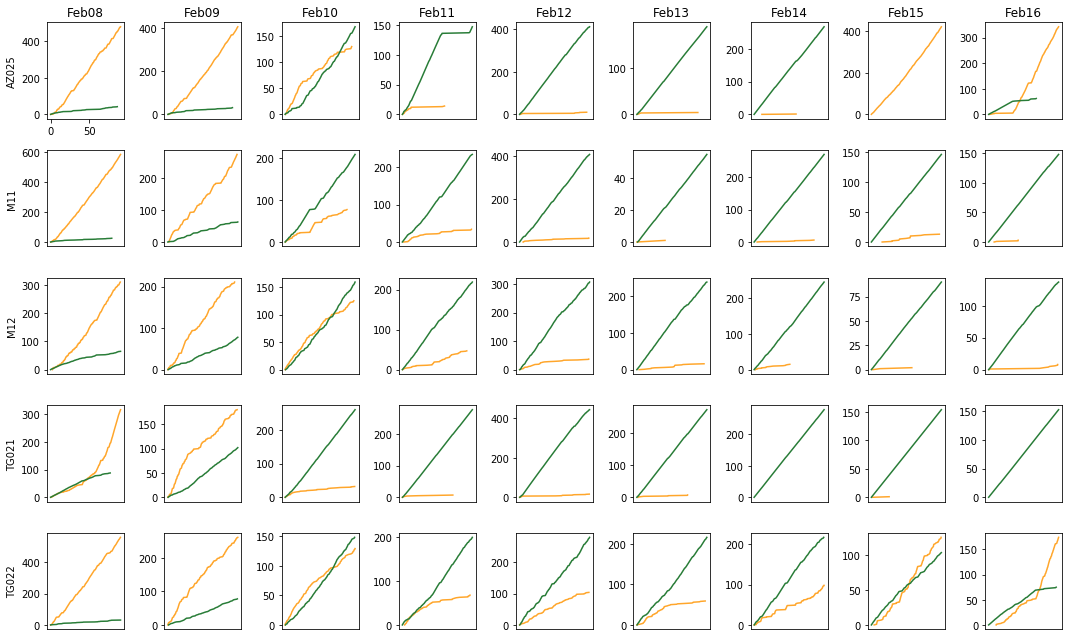

In [3]:
hf, hsps = plt.subplots(len(listSubj),len(listSess[iSubj]),figsize=(15,9))

for iSubj in range(len(listSubj)) :
    for iSess in range(len(listSess[iSubj])) :
        plt.subplot(len(listSubj),len(listSess[iSubj]),1 + (iSubj*len(listSess[iSubj])) + iSess)

        ndxChoL = dataSing[iSubj][iSess].ChoiceLeft.values
        ndxChoR = np.logical_not(ndxChoL)
        plt.plot(np.asarray(dataSing[iSubj][iSess].tsState0.values[ndxChoL]-dataSing[iSubj][iSess].tsState0.values[0])/60,np.arange(np.sum(ndxChoL)), color='xkcd:mango')
        plt.plot(np.asarray(dataSing[iSubj][iSess].tsState0.values[ndxChoR]-dataSing[iSubj][iSess].tsState0.values[0])/60,np.arange(np.sum(ndxChoR)), color='xkcd:darkish green')
        
        if (iSess > 0 or iSubj > 0) :
            plt.xticks([])
            
        if iSess == 0 :
            plt.ylabel(listSubj[iSubj])
            
        if iSubj == 0 :
            date = re.split('_',listSess[iSubj][iSess])
            plt.title(date[2])

plt.tight_layout()

__Figure 1: Response rates__ Cumulative sum of responses at left (yellow) and right (green) choice ports as a function of time since session start. All sessions lasted 90 min. n = 5 subjects, 9 sessions each.

Display pre- and post- reward delays used in each session:

In [4]:
pivoted = pd.pivot_table(dataSumm.summary,index=['subject','date'])
display(pivoted.loc[:,pivoted.columns[::-1]])

preR  preL  posR  posL     pLeft   logOdds
subject date                                             
AZ025   Feb08   2.0   2.0  32.0   2.0  0.917782  2.412586
        Feb09   2.0   4.0  32.0   2.0  0.926941  2.540617
        Feb10   2.0   8.0  16.0   2.0  0.436667 -0.254701
        Feb11   2.0   8.0  16.0   2.0  0.092025 -2.289162
        Feb12   2.0   8.0   8.0   2.0  0.026005 -3.623128
        Feb13   2.0   8.0  16.0   2.0  0.025641 -3.637586
        Feb14   2.0   4.0  16.0   2.0  0.007407 -4.897840
        Feb15   NaN   4.0   NaN   2.0  1.000000       inf
        Feb16   2.0   2.0  32.0   2.0  0.844828  1.694596
M11     Feb08   2.0   2.0  32.0   2.0  0.957377  3.111804
        Feb09   2.0   4.0  32.0   2.0  0.811765  1.461518
        Feb10   2.0   8.0  16.0   2.0  0.271777 -0.985625
        Feb11   2.0   8.0  16.0   2.0  0.129630 -1.904237
        Feb12   2.0   8.0   8.0   2.0  0.044393 -3.069276
        Feb13   2.0   8.0  16.0   2.0  0.034483 -3.332205
        Feb14   2.0   4.0  16.0   2.0  0.025180 -3.656209
        Feb15   2.0   4.0  32.0   2.0  0.086957 -2.351375
        Feb16   2.0   2.0  32.0   2.0  0.026144 -3.617652
M12     Feb08   2.0   2.0  32.0   2.0  0.825397  1.553348
        Feb09   2.0   4.0  32.0   2.0  0.728522  0.987138
        Feb10   2.0   8.0  16.0   2.0  0.440559 -0.238892
        Feb11   2.0   8.0  16.0   2.0  0.179104 -1.522427
        Feb12   2.0   8.0   8.0   2.0  0.109827 -2.092514
        Feb13   2.0   8.0  16.0   2.0  0.066148 -2.647426
        Feb14   2.0   4.0  16.0   2.0  0.060837 -2.736800
        Feb15   2.0   4.0  32.0   2.0  0.031915 -3.412247
        Feb16   2.0   2.0  32.0   2.0  0.061224 -2.730029
TG021   Feb08   2.0   2.0  32.0   2.0  0.781327  1.273415
        Feb09   2.0   4.0  32.0   2.0  0.637324  0.563768
        Feb10   2.0   8.0  16.0   2.0  0.112245 -2.068013
        Feb11   2.0   8.0  16.0   2.0  0.028070 -3.544576
        Feb12   2.0   8.0   8.0   2.0  0.036876 -3.262611
        Feb13   2.0   8.0  16.0   2.0  0.028470 -3.530030
        Feb14   2.0   4.0  16.0   2.0  0.003559 -5.634790
        Feb15   2.0   4.0  32.0   2.0  0.012739 -4.350278
        Feb16   2.0   NaN  32.0   NaN  0.000000      -inf
TG022   Feb08   2.0   2.0  32.0   2.0  0.945946  2.862201
        Feb09   2.0   4.0  32.0   2.0  0.769006  1.202706
        Feb10   2.0   8.0  16.0   2.0  0.465950 -0.136412
        Feb11   2.0   8.0  16.0   2.0  0.255556 -1.069198
        Feb12   2.0   8.0   8.0   2.0  0.272021 -0.984394
        Feb13   2.0   8.0  16.0   2.0  0.216606 -1.285553
        Feb14   2.0   4.0  16.0   2.0  0.312303 -0.789375
        Feb15   2.0   4.0  32.0   2.0  0.547414  0.190227
        Feb16   2.0   2.0  32.0   2.0  0.697211  0.834053

**Table 1: Delays** Delays pre- and post- left and right choices, fraction of left choices, and log odds of choices

## Is choice best explained by pre-, post-, os summed-delays?

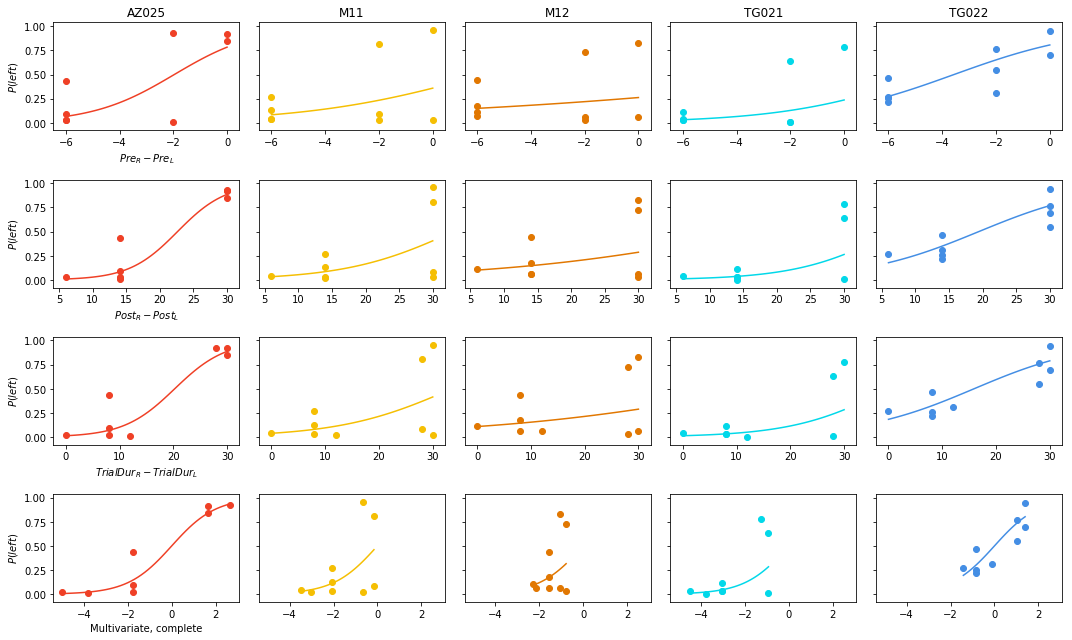

In [5]:
hf, ha = plt.subplots(4,5,sharey='all',sharex='row',figsize=(15,9))
colors = ['xkcd:tomato','xkcd:golden','xkcd:pumpkin','xkcd:aqua blue','xkcd:dark sky blue']
for iSubj in range(len(listSubj)) :
    ndxSubj = dataSumm.summary.dropna(how='any').loc[:,'subject'] == listSubj[iSubj]
    
    y = dataSumm.summary.dropna(how='any').loc[ndxSubj,'pLeft']
    yLog = dataSumm.summary.dropna(how='any').loc[ndxSubj,'logOdds']
    X = dataSumm.summary.dropna(how='any')[ndxSubj]
    
    # Model 1: Pre-reward delays
    Xa = X.loc[:,['preR']].values - X.loc[:,['preL']]
    ha[0,iSubj].scatter(Xa,y,color=colors[iSubj])
    ha[0,iSubj].set_title(listSubj[iSubj])
    mdl = sm.OLS(yLog,sm.add_constant(Xa)).fit()
    xcont = np.linspace(Xa.min(),Xa.max(),50)
    ha[0,iSubj].plot(xcont,1/(1+np.exp(-mdl.predict(sm.add_constant(xcont)))),color=colors[iSubj])
    if iSubj == 0 :
        ha[0,iSubj].set_xlabel('$Pre_R - Pre_L$')
        ha[0,iSubj].set_ylabel('$P(left)$')
    
    # Model 2: Post-reward delays
    Xb = X.loc[:,['posR']].values - X.loc[:,['posL']]
    ha[1,iSubj].scatter(Xb,y,color=colors[iSubj])
    mdl = sm.OLS(yLog,sm.add_constant(Xb)).fit()
    xcont = np.linspace(Xb.min(),Xb.max(),50)
    ha[1,iSubj].plot(xcont,1/(1+np.exp(-mdl.predict(sm.add_constant(xcont)))),color=colors[iSubj])
    if iSubj == 0 :
        ha[1,iSubj].set_xlabel('$Post_R - Post_L$')
        ha[1,iSubj].set_ylabel('$P(left)$')
    
    # Model 3: Total trial duration
    Xc = X.loc[:,['preR','posR']].sum(axis=1).values-X.loc[:,['preL','posL']].sum(axis=1).values
    ha[2,iSubj].scatter(Xc,y,color=colors[iSubj])
    mdl = sm.OLS(yLog,sm.add_constant(Xc)).fit()
    xcont = np.linspace(Xc.min(),Xc.max(),50)
    ha[2,iSubj].plot(xcont,1/(1+np.exp(-mdl.predict(sm.add_constant(xcont)))),color=colors[iSubj])
    if iSubj == 0 :
        ha[2,iSubj].set_xlabel('$TrialDur_R - TrialDur_L$')
        ha[2,iSubj].set_ylabel('$P(left)$')

    # Model 4: Multivariate (pre- and post- independently)
    M = X.loc[:,['preL','posR']].values
    mdl = sm.OLS(yLog,sm.add_constant(M)).fit()
    Xd = mdl.predict(sm.add_constant(M))
    ha[3,iSubj].scatter(Xd,y,color=colors[iSubj])
    xcont = np.linspace(Xd.min(),Xd.max(),50)
    ha[3,iSubj].plot(xcont,1/(1+np.exp(-xcont)),color=colors[iSubj])
    if iSubj == 0 :
        ha[3,iSubj].set_xlabel('Multivariate, complete')
        ha[3,iSubj].set_ylabel('$P(left)$')
    
plt.tight_layout()

__Figure 2: Regresion models for P(choice)__ n = 5 subjects, 9 sessions each. Model specifications:

Model 1: $log{\frac{P_L}{(1-P_L)}} = \beta_0 + \beta_1(Pre_R - Pre_L)$

Model 2: $log{\frac{P_L}{(1-P_L)}} = \beta_0 + \beta_1(Post_R - Post_L)$

Model 3: $log{\frac{P_L}{(1-P_L)}} = \beta_0 + \beta_1(Pre_R + Post_R - Pre_L - Post_L)$

Model 4*: $log{\frac{P_L}{(1-P_L)}} = \beta_0 + \beta_1Pre_L + \beta_2Post_R$

(* $Post_L$ and $Post_R$ are constants and were thus left out)

## Histeresis on the relation between delays and P(choice) 

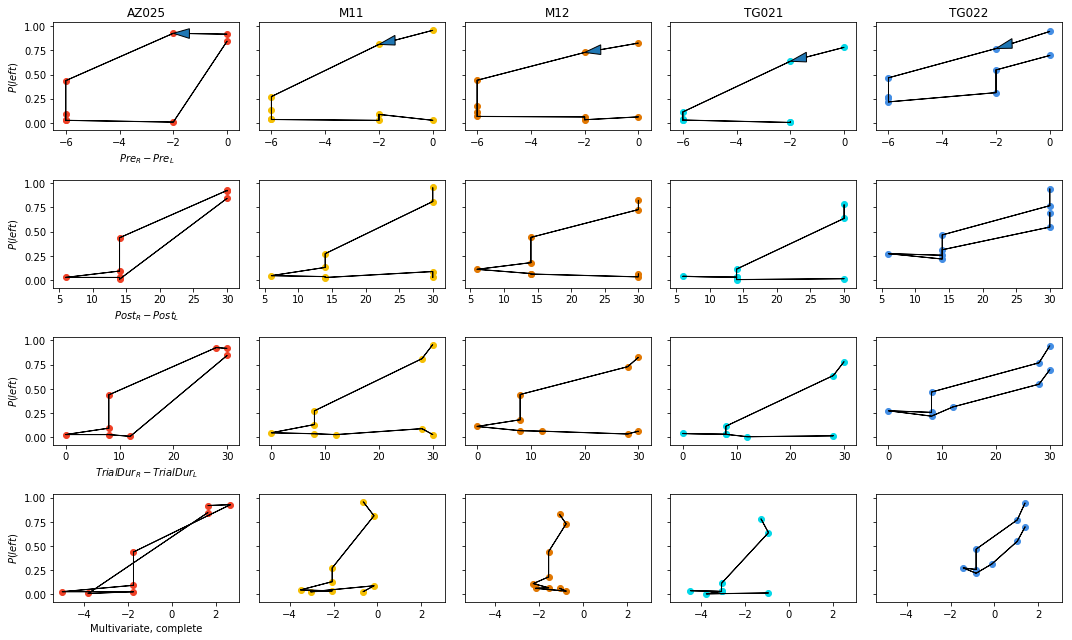

In [6]:
hf, ha = plt.subplots(4,5,sharey='all',sharex='row',figsize=(15,9))
colors = ['xkcd:tomato','xkcd:golden','xkcd:pumpkin','xkcd:aqua blue','xkcd:dark sky blue']
for iSubj in range(len(listSubj)) :
    ndxSubj = dataSumm.summary.dropna(how='any').loc[:,'subject'] == listSubj[iSubj]

    y = dataSumm.summary.dropna(how='any').loc[ndxSubj,'pLeft']
    yLog = dataSumm.summary.dropna(how='any').loc[ndxSubj,'logOdds']
    X = dataSumm.summary.dropna(how='any')[ndxSubj]
    
    # Model 1: Pre-reward delays
    Xa = X.loc[:,['preR']].values - X.loc[:,['preL']]
    ha[0,iSubj].arrow(np.asscalar(Xa.iloc[0]),y.iloc[0],np.asscalar(np.diff(Xa,axis=0)[0]),np.asscalar(np.diff(y,axis=0)[0]),head_width=0.1,head_length=0.6,length_includes_head=True)
    for iSess in range(1,len(y)-1) :
        ha[0,iSubj].arrow(np.asscalar(Xa.iloc[iSess]),y.iloc[iSess],np.asscalar(np.diff(Xa,axis=0)[iSess]),np.asscalar(np.diff(y,axis=0)[iSess]))
    ha[0,iSubj].scatter(Xa,y,color=colors[iSubj])
    ha[0,iSubj].set_title(listSubj[iSubj])
    if iSubj == 0 :
        ha[0,iSubj].set_xlabel('$Pre_R - Pre_L$')
        ha[0,iSubj].set_ylabel('$P(left)$')

    # Model 2: Post-reward delays
    Xb = X.loc[:,['posR']].values - X.loc[:,['posL']]
    for iSess in range(0,len(y)-1) :
        ha[1,iSubj].arrow(np.asscalar(Xb.iloc[iSess]),y.iloc[iSess],np.asscalar(np.diff(Xb,axis=0)[iSess]),np.asscalar(np.diff(y,axis=0)[iSess]))
    ha[1,iSubj].scatter(Xb,y,color=colors[iSubj])
    if iSubj == 0 :
        ha[1,iSubj].set_xlabel('$Post_R - Post_L$')
        ha[1,iSubj].set_ylabel('$P(left)$')

    # Model 3: Total trial duration
    Xc = X.loc[:,['preR','posR']].sum(axis=1).values-X.loc[:,['preL','posL']].sum(axis=1).values
    for iSess in range(0,len(y)-1) :
        ha[2,iSubj].arrow(np.asscalar(Xc[iSess]),y.iloc[iSess],np.asscalar(np.diff(Xc,axis=0)[iSess]),np.asscalar(np.diff(y,axis=0)[iSess]))
    ha[2,iSubj].scatter(Xc,y,color=colors[iSubj])
    if iSubj == 0 :
        ha[2,iSubj].set_xlabel('$TrialDur_R - TrialDur_L$')
        ha[2,iSubj].set_ylabel('$P(left)$')

    # Model 4: Multivariate (pre- and post- independently)
    M = X.loc[:,['preL','posR']].values
    mdl = sm.OLS(yLog,sm.add_constant(M)).fit()
    Xd = mdl.predict(sm.add_constant(M))
    for iSess in range(0,len(y)-1) :
        ha[3,iSubj].arrow(np.asscalar(Xd[iSess]),y.iloc[iSess],np.asscalar(np.diff(Xd,axis=0)[iSess]),np.asscalar(np.diff(y,axis=0)[iSess]))
    ha[3,iSubj].scatter(Xd,y,color=colors[iSubj])
    if iSubj == 0 :
        ha[3,iSubj].set_xlabel('Multivariate, complete')
        ha[3,iSubj].set_ylabel('$P(left)$')
        
plt.tight_layout()

__Figure 3: Histeresis in how delays affect P(choice)__ Scatter plots are identical to those in Figure 2. For top row, first session is top-right data point for all animals, as indicated by arrow. Sequence of sessions in indicated by lines connecting dots.


Histeresis is probably explained by lack of exploration: this would be expected if animals stuck to whatever policy they had at the end of the previous session. If that's the case, the same should not be observed under __discrate_ds2__.